In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
circuit_image = cv2.imread(os.path.relpath('data/rot_circuit.tiff'))

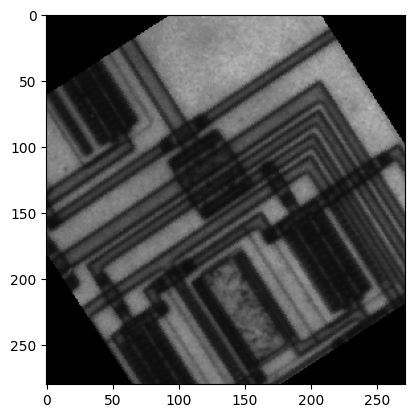

In [3]:
plt.imshow(circuit_image)

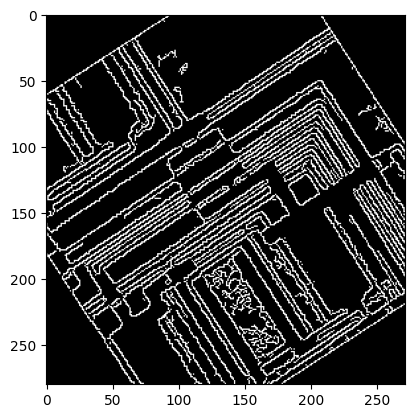

In [4]:
# Convert the image to grayscale
gray = cv2.cvtColor(circuit_image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

plt.imshow(edges,cmap='gray')

In [5]:
# Apply Hough Line Transform (Standard Hough Transform)
# Parameters:
# edges: Output of the edge detector.
# 1: Distance resolution of the accumulator in pixels.
# np.pi/180: Angle resolution of the accumulator in radians.
# 200: Accumulator threshold parameter. Only lines with enough votes are returned.

lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

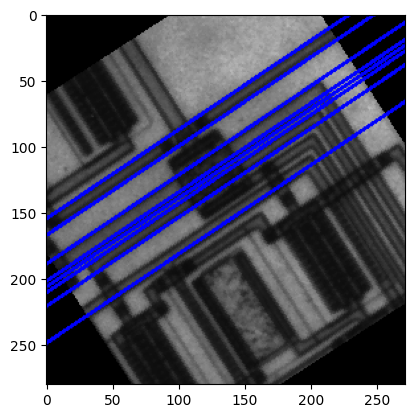

In [6]:
# Draw the detected lines on the original image
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(circuit_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
plt.imshow(circuit_image)

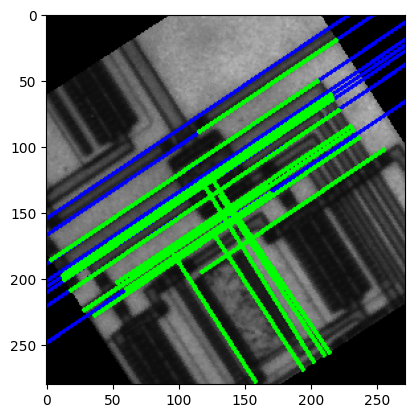

In [7]:
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(circuit_image,(x1,y1),(x2,y2),(0,255,0),2)


plt.imshow(circuit_image)

Hough Circles

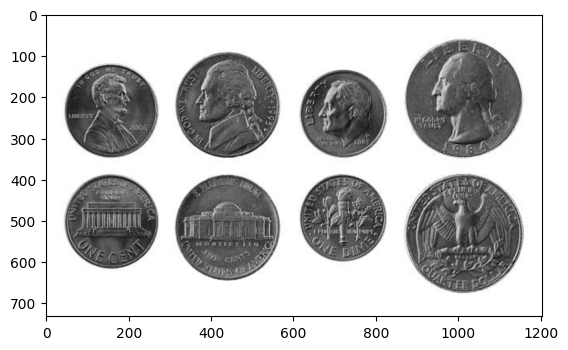

In [48]:
coins = cv2.imread(os.path.relpath('../../Data/Coins2.png'))

coinsG = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)

plt.imshow(coinsG,cmap='gray')

In [49]:
# Detect circles using HoughCircles
    # Parameters:
    # - cv2.HOUGH_GRADIENT: Detection method (currently the only one available).
    # - dp: Inverse ratio of the accumulator resolution to the image resolution.
    #       1 means same resolution, 2 means half resolution.
    # - minDist: Minimum distance between the centers of the detected circles.
    # - param1: Upper threshold for the Canny edge detector used internally.
    # - param2: Accumulator threshold for the circle centers. Smaller values
    #           detect more circles, potentially including false positives.
    # - minRadius: Minimum circle radius to detect.
    # - maxRadius: Maximum circle radius to detect.


circles = cv2.HoughCircles(coinsG, cv2.HOUGH_GRADIENT, dp=1, minDist=50,
                               param1=50, param2=100, minRadius=75, maxRadius=200)


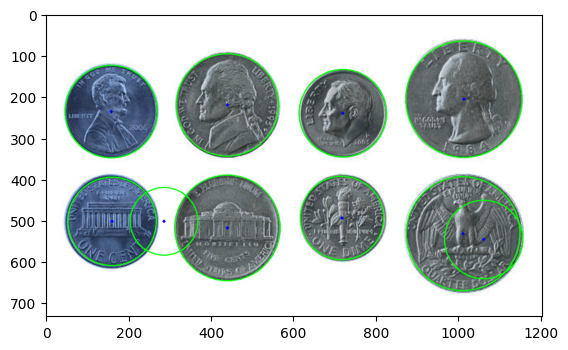

In [40]:
# If circles are detected, draw them on the original image
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(coins, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(coins, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.imshow(coins)

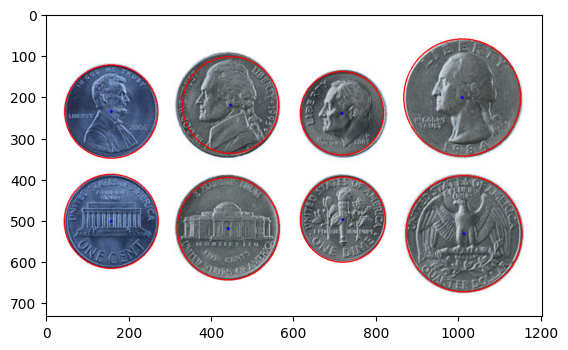

In [50]:
gray_blurred = cv2.medianBlur(coinsG, 5)

circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=50,
                               param1=50, param2=100, minRadius=75, maxRadius=200)

# If circles are detected, draw them on the original image
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw the outer circle
        cv2.circle(coins, (i[0], i[1]), i[2], (255,0, 0), 2)
        # Draw the center of the circle
        cv2.circle(coins, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.imshow(coins)